<a href="https://colab.research.google.com/github/justinwickelgren/data-science-class/blob/main/JustWickU7Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-zrzdl09z
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-zrzdl09z
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [38]:
import xarray as xr

In [39]:
!pip install bambi

In [40]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

# Hazelnut Color
This project uses a University of Florida dataset to model the color change in hazelnuts when roasted. I will be trying to predict the mean lightness value for hazelnuts using roasting temperature and/or minutes of roasting. This is interesting because I enjoy eating hazelnuts and I would like to learn more about how they are prepared.

In [41]:
url = "https://users.stat.ufl.edu/~winner/data/hazelnut_color.csv"
hazelnuts = pd.read_csv(url)
hazelnuts

,Process,tempC,minutes,fosaWmn,fosaWsd,fosaGmn,fosaGsd,palazWmn,palazWsd,palazGmn,palazGsd,tombulWmn,tombulWsd,tombulGmn,tombulGsd
0,1,0,0,82.56,1.22,81.66,2.18,78.39,1.86,81.88,1.65,82.96,1.35,79.90,0.25
1,2,125,15,81.05,1.43,74.14,0.40,79.46,0.46,74.65,1.61,78.32,0.41,72.72,0.28
2,3,125,25,76.81,1.58,74.90,0.59,75.97,1.32,74.12,1.51,76.83,1.21,71.69,0.21
3,4,125,35,76.32,1.99,74.59,1.05,74.27,2.06,72.48,0.93,74.75,0.94,70.99,0.39
4,5,125,45,74.56,1.80,72.63,0.58,73.60,1.66,71.03,0.83,72.71,0.92,70.01,0.22
5,6,125,55,73.55,1.65,72.22,0.67,72.08,0.40,70.43,0.52,70.44,1.29,69.14,0.30
6,7,135,13,79.33,0.91,75.36,1.32,78.77,0.62,73.46,1.88,77.69,0.67,72.23,0.25
7,8,135,22,78.51,1.21,73.63,0.79,76.00,1.06,71.75,0.81,76.98,0.68,71.60,0.22
8,9,135,31,75.70,1.08,72.13,0.40,75.24,1.12,71.57,0.60,75.93,1.62,71.05,0.55
9,10,135,40,73.84,1.82,70.65,0.91,74.24,0.70,70.03,1.23,71.81,0.59,68.58,0.63


## Data cleaning
First, I will alter the data to change the variety of hazelnut (either fosa, palaz, or tombul) and the whole or ground nature of the hazelnuts to be categorical variables and consolidate the mean value into one column. I will also drop the standard deviation columns because I will not attempt to model it.

In [42]:
hazelnuts.insert(0, "variety", [""]*26)
hazelnuts.insert(0, "state", [""]*26)
hazelnuts = hazelnuts.loc[hazelnuts.index.repeat(3)].reset_index(drop=True)
varieties = ["fosa", "palaz", "tombul"]
count = 0
for index in range(len(hazelnuts)):
  hazelnuts.at[index, "variety"] = varieties[count]
  if varieties[count] == "palaz":
    hazelnuts.at[index, "fosaWmn"] = hazelnuts.at[index, "palazWmn"]
    hazelnuts.at[index, "fosaGmn"] = hazelnuts.at[index, "palazGmn"]
  if varieties[count] == "tombul":
    hazelnuts.at[index, "fosaWmn"] = hazelnuts.at[index, "tombulWmn"]
    hazelnuts.at[index, "fosaGmn"] = hazelnuts.at[index, "tombulGmn"]
  count = (count + 1) % 3
hazelnuts = hazelnuts.drop("fosaWsd", axis=1)
hazelnuts = hazelnuts.drop("palazWsd", axis=1)
hazelnuts = hazelnuts.drop("tombulWsd", axis=1)
hazelnuts = hazelnuts.drop("fosaGsd", axis=1)
hazelnuts = hazelnuts.drop("palazGsd", axis=1)
hazelnuts = hazelnuts.drop("tombulGsd", axis=1)
hazelnuts = hazelnuts.drop("palazWmn", axis=1)
hazelnuts = hazelnuts.drop("tombulWmn", axis=1)
hazelnuts = hazelnuts.drop("palazGmn", axis=1)
hazelnuts = hazelnuts.drop("tombulGmn", axis=1)
hazelnuts = hazelnuts.rename(columns={"fosaWmn": "Wmn"})
hazelnuts = hazelnuts.rename(columns={"fosaGmn": "Gmn"})
hazelnuts = hazelnuts.loc[hazelnuts.index.repeat(2)].reset_index(drop=True)
states = ["whole", "ground"]
count = 0
for index in range(len(hazelnuts)):
  hazelnuts.at[index, "state"] = states[count]
  if states[count] == "ground":
    hazelnuts.at[index, "Wmn"] = hazelnuts.at[index, "Gmn"]
  count = (count + 1) % 2
hazelnuts = hazelnuts.drop("Gmn", axis=1)
hazelnuts = hazelnuts.rename(columns={"Wmn": "mean"})
hazelnuts = hazelnuts.drop("Process", axis=1)
hazelnuts

,state,variety,tempC,minutes,mean
0,whole,fosa,0,0,82.56
1,ground,fosa,0,0,81.66
2,whole,palaz,0,0,78.39
3,ground,palaz,0,0,81.88
4,whole,tombul,0,0,82.96
...,...,...,...,...,...
151,ground,fosa,165,30,64.55
152,whole,palaz,165,30,68.72
153,ground,palaz,165,30,63.70
154,whole,tombul,165,30,70.08


## Variable Selection

There are two potential predictors provided in this dataset, plus two categorical variables:

Temperature: I think that temperature causes color change because roasting changes color and without increased temperature, the roasting would be doing nothing to them.

Minutes: I think that minutes also causes color change because roasting something for longer should have a bigger effect than doing it for a shorter time.

Variety: I think the variety of hazelnut might have an effect. Different types could have different roasting properties, but they also may not because I don't know much about this process.

Whole vs ground ("state" in the dataframe): I think that this likely has an effect because ground hazelnuts will likely roast faster since they have more surface area exposed to the heat. Additionally, the interior of the hazelnut may roast differently than the exterior.

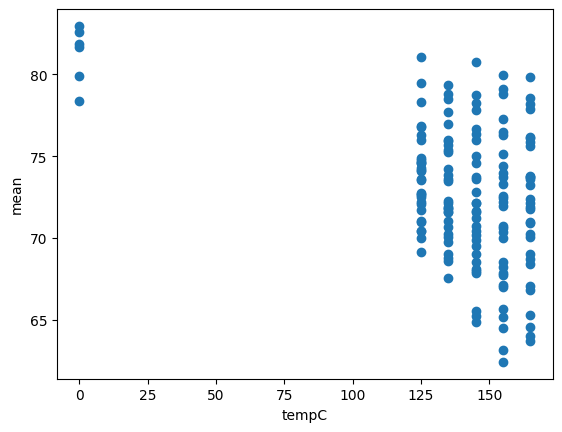

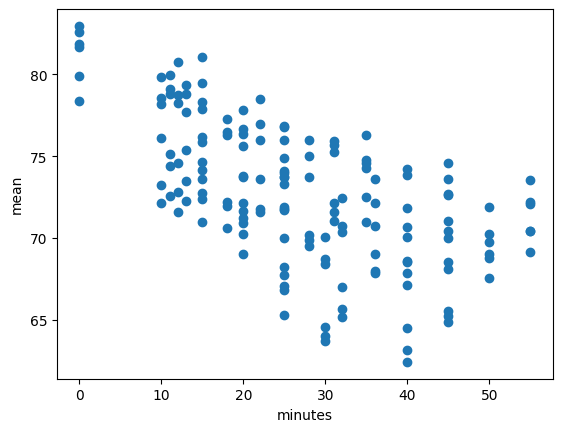

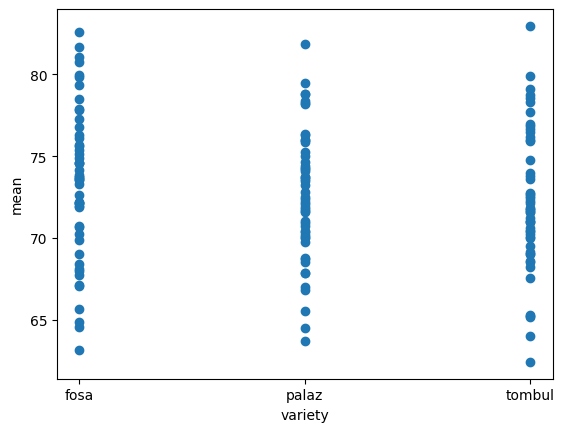

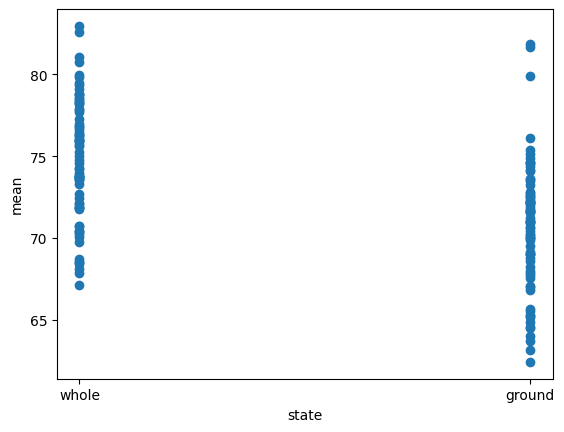

In [43]:
x = ["tempC", "minutes", "variety", "state"]
y = "mean"
for a in x:
  plt.scatter(hazelnuts[a], hazelnuts[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

These scatterplots suggest that my hypotheses were probably mostly correct. Both tempC and minutes appear to have a relationship with color change. Variety doesn't really seem to have one, and whole vs ground seems to have a small relationship. I will make 4 models: one with only  tempC and minutes, one each with variety and whole vs ground added, and one with both added.

In [44]:
model = bmb.Model("mean ~ tempC + minutes", hazelnuts)
idata = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [45]:
model_2 = bmb.Model("mean ~ tempC + minutes + variety", hazelnuts)
idata_2 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [46]:
model_3 = bmb.Model("mean ~ tempC + minutes + state", hazelnuts)
idata_3 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [47]:
model_4 = bmb.Model("mean ~ tempC + minutes + variety + state", hazelnuts)
idata_4 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [48]:
compare = az.compare({"tempC + minutes": idata, "+ variety": idata_2, "+ state": idata_3, "+ variety + state": idata_4})
compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
+ variety,0,-401.058496,3.771747,0.000000,1.000000e+00,7.281441,0.000000,False,log
+ variety + state,1,-401.097251,3.747395,0.038755,3.053113e-16,7.242583,0.042610,False,log
tempC + minutes,2,-401.155228,3.831252,0.096733,2.128409e-16,7.280400,0.032702,False,log
+ state,3,-401.163843,3.850930,0.105347,0.000000e+00,7.259073,0.037426,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

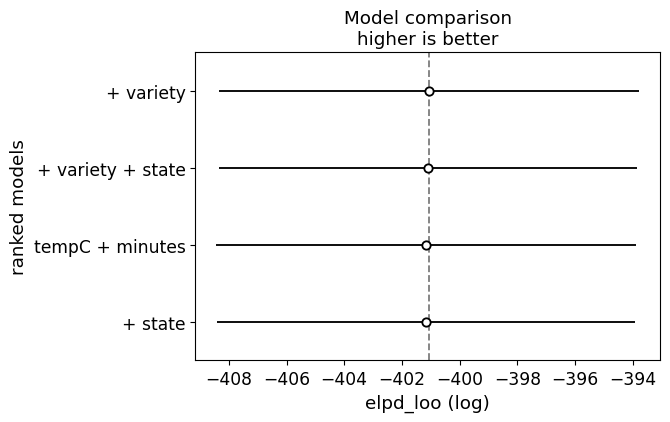

In [49]:
az.plot_compare(compare)

Because all of these models have almost identical elpd_loo, I will pick the tempC and minutes only model to minimize the risk of overfitting (since that has the least predictors). I will also try using these predictors with different models to see if I can improve further.

In [60]:
model = bmb.Model("mean ~ tempC + minutes", hazelnuts)
idata = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [61]:
model_2 = bmb.Model("mean ~ poly(tempC + minutes, degree=2)", hazelnuts)
idata_2 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [62]:
model_3 = bmb.Model("mean ~ poly(tempC + minutes, degree=3)", hazelnuts)
idata_3 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [63]:
model_4 = bmb.Model("mean ~ bs(tempC + minutes, degree=1, df=10)", hazelnuts)
idata_4 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [64]:
model_5 = bmb.Model("mean ~ hsgp(tempC + minutes, m=10, c=1.5)", hazelnuts)
idata_5 = model.fit(idata_kwargs={"log_likelihood":True})

Output()

In [65]:
compare = az.compare({"linear": idata, "quadratic": idata_2, "cubic": idata_3, "b spline": idata_4, "hsgp": idata_5})
compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
quadratic,0,-400.927485,3.625149,0.000000,1.000000e+00,7.270901,0.000000,False,log
hsgp,1,-400.940731,3.631975,0.013246,2.026157e-15,7.244062,0.048180,False,log
linear,2,-400.978377,3.651979,0.050892,0.000000e+00,7.240787,0.093036,False,log
cubic,3,-401.025464,3.738417,0.097979,2.145236e-16,7.296655,0.074691,False,log
b spline,4,-401.105087,3.804228,0.177602,0.000000e+00,7.274748,0.082323,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

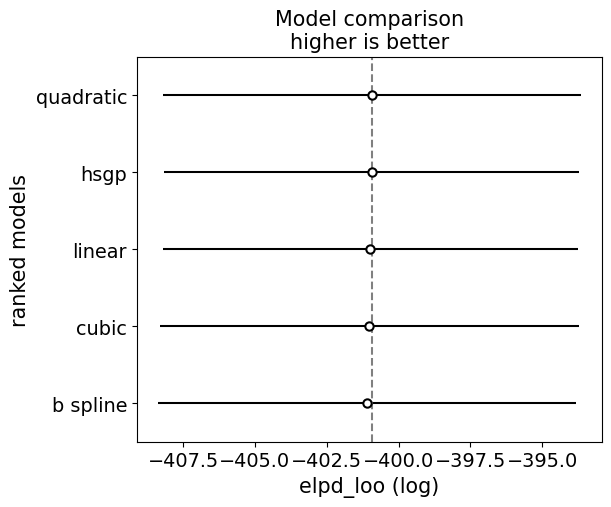

In [66]:
az.plot_compare(compare)

All the models are basically equally good. Therefore, I will pick the linear model because it is the simplest of the four. Here is more information about that model:

In [67]:
model

       Formula: mean ~ tempC + minutes
        Family: gaussian
          Link: mu = identity
  Observations: 156
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 72.7471, sigma: 53.7885)
            tempC ~ Normal(mu: 0.0, sigma: 0.3452)
            minutes ~ Normal(mu: 0.0, sigma: 0.8001)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 4.3)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='tempC', ylabel='mean'>], dtype=object))

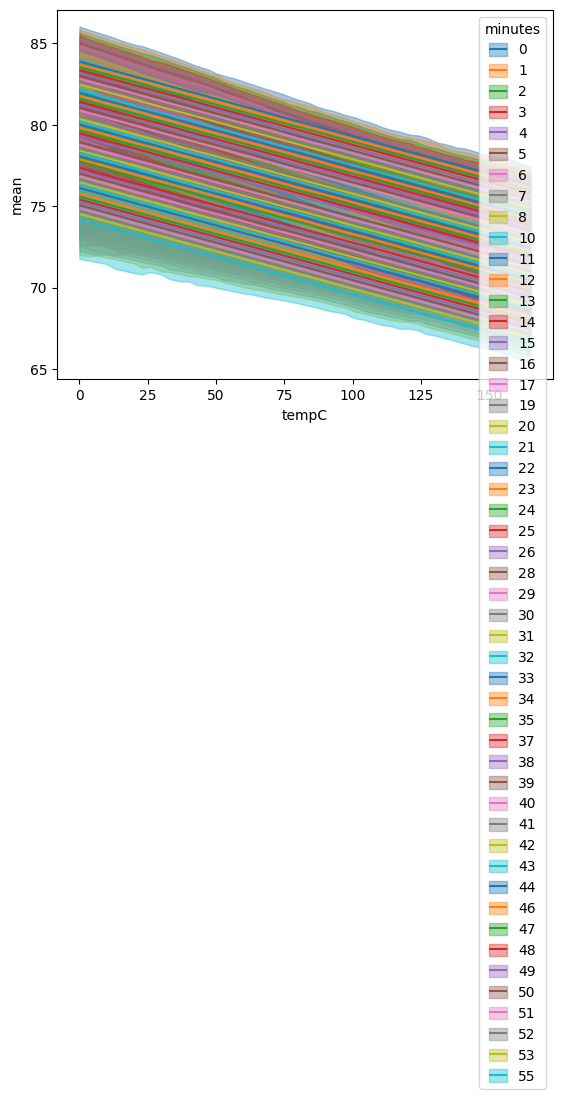

In [68]:
bmb.interpret.plot_predictions(model, idata, ["tempC", "minutes"])

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='minutes', ylabel='mean'>], dtype=object))

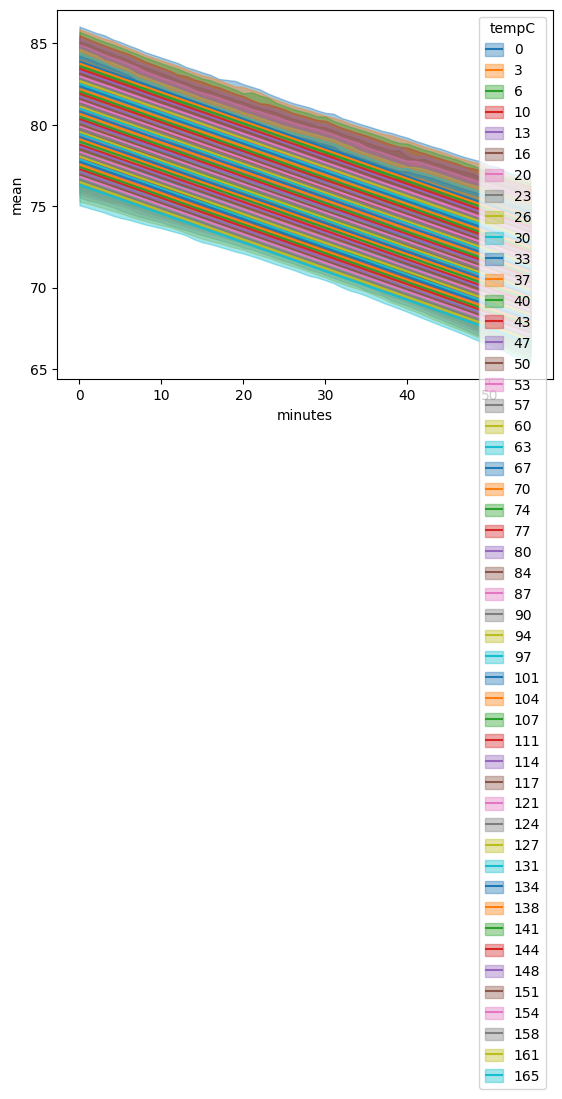

In [69]:
bmb.interpret.plot_predictions(model, idata, ["minutes", "tempC"])

These graphs show that both temperature and minutes are negatively correlated with mean color change value (where a lower value means more color change). This fits with my intuition because roasting hotter and longer should lead to most change in color. Therefore, I think this model accurately models the underlying process and is not overfitted.